In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
from models import logistic_regression, random_forest, xgboost
from analysis import scree_plot, two_variable_pca, t_sne
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 96

In [3]:
## Load data
genres = [
    "Hip-Hop",
    "Pop",
    "Folk",
    "Experimental",
    "Rock",
    "International",
    "Electronic",
    "Instrumental",
]

df = pd.read_csv('../data/features.csv', header=0)
df['genre'] = df.genre_code.apply(lambda x : genres[x])

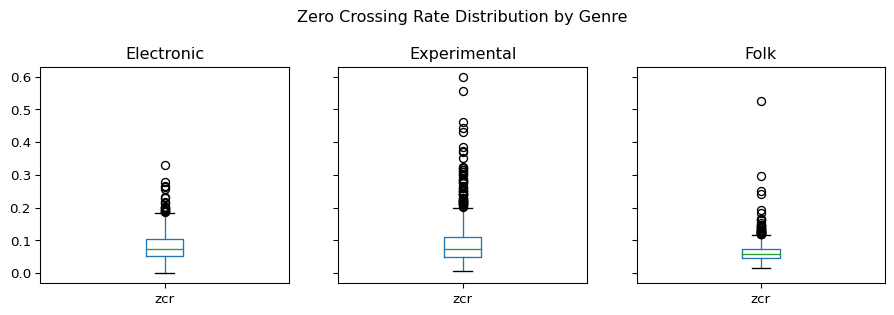

In [4]:
df[df.genre.isin(['Electronic', 'Experimental', 'Folk'])][['zcr', 'genre']].groupby('genre').boxplot(column='zcr', grid=False, layout=(1,3), figsize=(11,3))
plt.suptitle('Zero Crossing Rate Distribution by Genre', y=1.1)
plt.savefig('../visualizations/zcr_distribution_by_genre.png', bbox_inches='tight', facecolor='w', transparent=False)

plt.show()

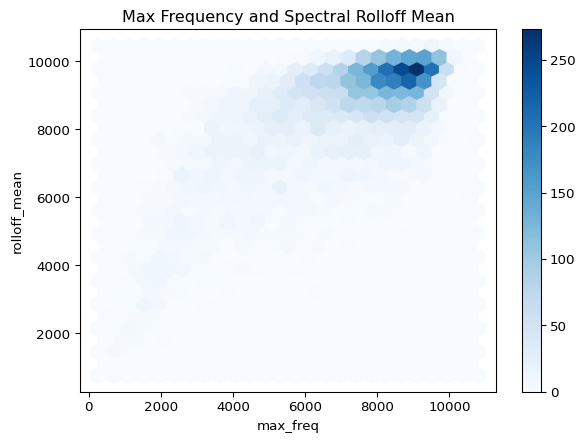

In [5]:
df.plot(kind='hexbin', x='max_freq', y='rolloff_mean', gridsize=25, figsize=(7, 5), cmap='Blues', sharex=False)
plt.title('Max Frequency and Spectral Rolloff Mean')

plt.savefig('../visualizations/max_frequency_and_spectrall_rolloff_mean.png', bbox_inches='tight', facecolor='w', transparent=False)

plt.show()

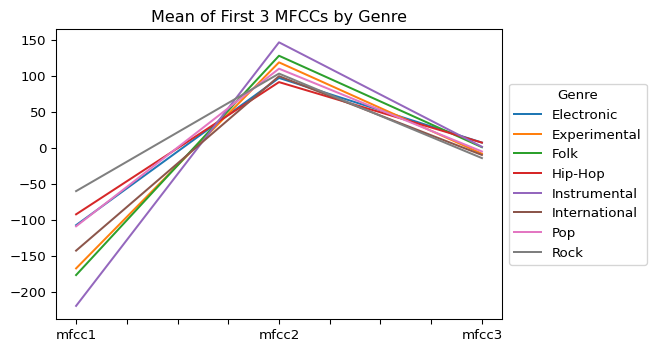

In [6]:
mfcc_cols = [f'mfcc{i}' for i in range(1,4)]

df[mfcc_cols + ['genre']].groupby('genre').mean().transpose().plot()
plt.title('Mean of First 3 MFCCs by Genre')
plt.legend(title='Genre', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.savefig('../visualizations/mfcc_means.png', bbox_inches='tight', facecolor='w', transparent=False)

plt.show()

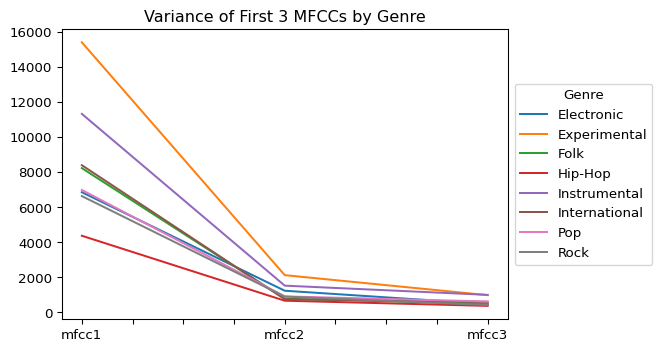

In [7]:
mfcc_cols = [f'mfcc{i}' for i in range(1,4)]

df[mfcc_cols + ['genre']].groupby('genre').var().transpose().plot()
plt.title('Variance of First 3 MFCCs by Genre')
plt.legend(title='Genre', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.savefig('../visualizations/mfcc_variances.png', bbox_inches='tight', facecolor='w', transparent=False)
plt.show()

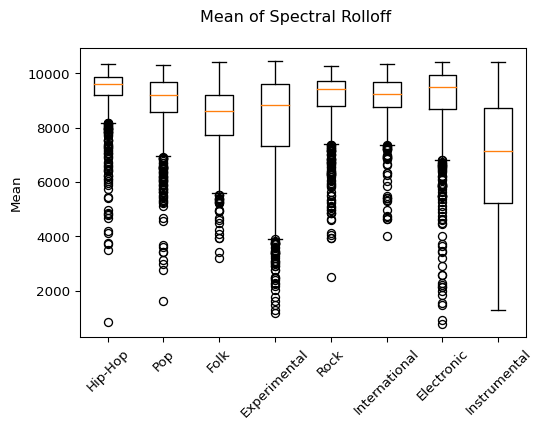

In [8]:
rolloff_mean = df["rolloff_mean"]

plt.boxplot(np.array([
    rolloff_mean[df["genre_code"] == i] for i in range(len(genres))
], dtype=object), labels=genres)
plt.suptitle("Mean of Spectral Rolloff")
plt.ylabel("Mean")
plt.xticks(rotation=45)

plt.savefig('../visualizations/spectral_rolloff_means.png', bbox_inches='tight', facecolor='w', transparent=False)
plt.show()

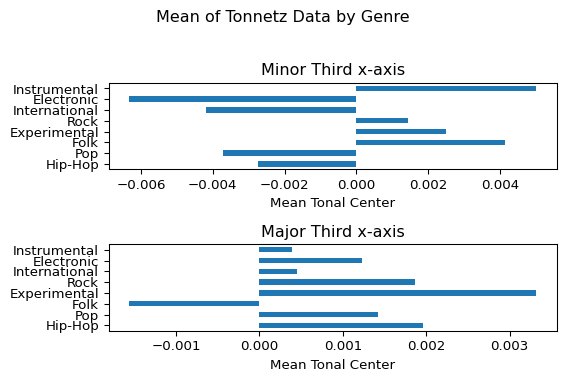

In [9]:
data = pd.read_csv('./../data/features.csv', index_col=0)

# Save the genre labels
genre_labels = ["Hip-Hop", "Pop", "Folk", "Experimental", "Rock", "International", "Electronic", "Instrumental"]
tonnetz_labels = ['Fifth x-axis', 'Fifth y-axis', 'Minor Third x-axis', 'Minor Third y-axis', 'Major Third x-axis', 'Major Third y-axis']

# Get the tonnetz features in their own dataframe and group by genre
tonnetz_features = data[['genre_code', 'tonnetz1', 'tonnetz2', 'tonnetz3', 'tonnetz4', 'tonnetz5', 'tonnetz6', 'tonnetz7', 'tonnetz8', 'tonnetz9', 'tonnetz10', 'tonnetz11', 'tonnetz12']]    
group = tonnetz_features.groupby('genre_code')

# Make some bar plots
fig, ax = plt.subplots(2, 1)
group.mean()['tonnetz' + str(5)].plot(kind='barh', ax=ax.reshape(-1)[0])
ax.reshape(-1)[0].set_yticklabels(genre_labels)
ax.reshape(-1)[0].set_xlabel('Mean Tonal Center')
ax.reshape(-1)[0].set_ylabel('')
ax.reshape(-1)[0].set_title(str(tonnetz_labels[2]))
group.mean()['tonnetz' + str(9)].plot(kind='barh', ax=ax.reshape(-1)[1])
ax.reshape(-1)[1].set_yticklabels(genre_labels)
ax.reshape(-1)[1].set_xlabel('Mean Tonal Center')
ax.reshape(-1)[1].set_ylabel('')
ax.reshape(-1)[1].set_title(str(tonnetz_labels[4]))
plt.suptitle('Mean of Tonnetz Data by Genre\n')
plt.tight_layout()

plt.savefig('../visualizations/mean_tonnetz.png', bbox_inches='tight', facecolor='w', transparent=False)
plt.show()


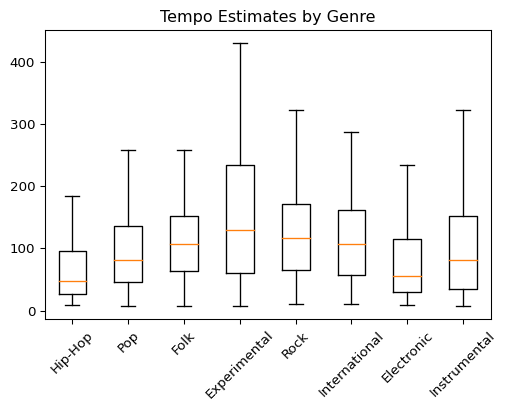

In [10]:
genre_labels = ["Hip-Hop", "Pop", "Folk", "Experimental", "Rock", "International", "Electronic", "Instrumental"]
data = pd.read_csv('./../data/features.csv', index_col=0)
tempo_features = data['tempo1']
plt.boxplot(np.array([
    tempo_features[data['genre_code'] == i] for i in range(len(genre_labels))
], dtype=object), labels=genre_labels, showfliers=False)
plt.xticks(rotation=45)
plt.title('Tempo Estimates by Genre')

plt.savefig('../visualizations/tempo_estimates.png', bbox_inches='tight', facecolor='w', transparent=False)
plt.show()

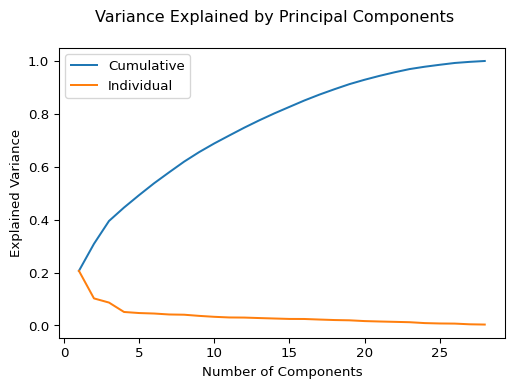

In [13]:
scree_plot(savefile_name='../visualizations/scree_plot.png')